<a href="https://colab.research.google.com/github/arun-arunisto/Track_ISS/blob/todo/ISStracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Exploring the International Space Station (ISS)</h2>

<h3>Interesting factors about ISS</h3>
<p>The International Space Station (ISS) is a habitable artificial satellite that orbits the Earth. It was first launched in 1998 and has been continuously inhabited by astronauts since 2000. The ISS is a joint project of five space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada).

The ISS is the largest human-made object in space, measuring approximately 110 meters in length and weighing around 420,000 kilograms. It orbits the Earth at an altitude of around 408 km and travels at a speed of around 28,000 km/h, completing one orbit around the Earth every 90 minutes.

The ISS is made up of multiple modules, each serving a different purpose. These modules include:
<ol>
<li>Zarya: The first module of the ISS, launched in 1998. It provides power and propulsion for the station.</li>
<li>Unity: The connecting module that joins the American and Russian segments of the ISS.</li>
<li>Destiny: The main research laboratory for the American segment of the ISS.</li>
<li>Zvezda: The living quarters for the Russian segment of the ISS.</li>
<li>Cupola: A module that provides a panoramic view of the Earth and is used for observing and controlling robotic operations outside the station.</li>
<li>Kibo: The Japanese research module that includes a robotic arm and an airlock for conducting experiments in space.</li>
<li>Columbus: The European research module that includes facilities for conducting experiments in a microgravity environment.</li>
</ol>
Overall, the ISS is a remarkable feat of human ingenuity and serves as a symbol of the possibilities of international cooperation and exploration.</p>

In [16]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
from pytrends.request import TrendReq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import Image

<h4>ISS Live feed</h4>
<a href="https://www.nasa.gov/multimedia/nasatv/iss_ustream.html">https://www.nasa.gov/multimedia/nasatv/iss_ustream.html</a>

<h4>API Used to get information</h4>
<a href="http://open-notify.org/">http://open-notify.org/</a>

In [18]:
#who is in the ISS right now
import requests
data = requests.get(url="http://api.open-notify.org/astros.json")
astronauts = data.json()
print("Astronauts on the board")
print(len("Astronauts on the board")*"-","\n")
for i in range(len(astronauts['people'])):
  print(astronauts['people'][i]['name'])
print("\nTotal Persons on board :",astronauts['number'])

Astronauts on the board
----------------------- 

Sergey Prokopyev
Dmitry Petelin
Frank Rubio
Fei Junlong
Deng Qingming
Zhang Lu
Stephen Bowen
Warren Hoburg
Sultan Alneyadi
Andrey Fedyaev

Total Persons on board : 10


In [19]:
#where is ISS right now?
data = requests.get(url="http://api.open-notify.org/iss-now.json")
location = data.json()
print("Latitude :",location['iss_position']['latitude'])
print("Longitude :",location['iss_position']['longitude'])

Latitude : -44.4937
Longitude : 77.8012


In [20]:
import folium


latitude = location['iss_position']['latitude']
longitude = location['iss_position']['longitude']

world_map = folium.Map()
folium.TileLayer('stamenterrain').add_to(world_map)
folium.Marker(location=[latitude, longitude], tooltip='<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/The_station_pictured_from_the_SpaceX_Crew_Dragon_5_%28cropped%29.jpg/1280px-The_station_pictured_from_the_SpaceX_Crew_Dragon_5_%28cropped%29.jpg" width="200"><br><a href="https://www.nasa.gov/mission_pages/station/main/index.html">International Space Station</a>').add_to(world_map)


world_map

In [21]:
#using basemap
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(0.5, 1.0, 'ISS Location')

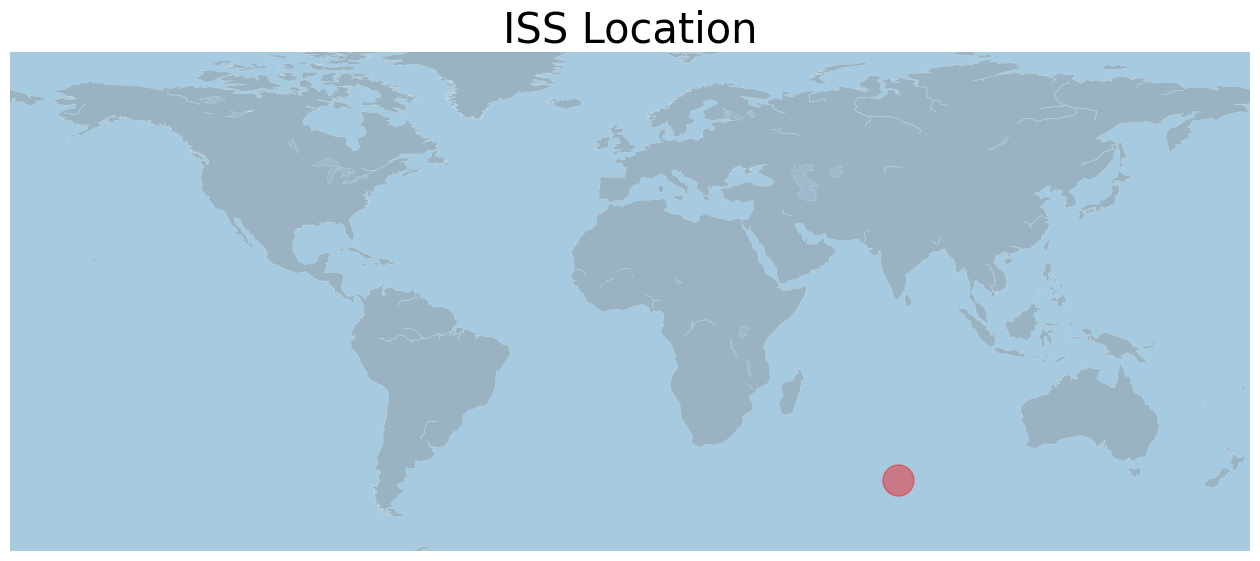

In [22]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16, 8))

#background map
map = Basemap(llcrnrlon=-180, llcrnrlat=-65, urcrnrlon=180, urcrnrlat=80)
map.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='grey', alpha=0.3)
map.drawcoastlines(linewidth=0.1, color="white")
map.scatter(float(longitude), float(latitude), s=500, alpha=0.4, color='red')
plt.title("ISS Location", fontsize=30)

<h4>Collect data</h4>
<p>iss orbits earth 15.5 perday, so let it run at least 2 hours to collect enough data to see it go around the earth once</p>

In [ ]:
#we are going to collect the data
record_data = True
if record_data == True:
  import datetime
  date_to_print = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
  import time
  starttime = time.time()
  space_station_data = []
  while True:
    data = requests.get(url="http://api.open-notify.org/iss-now.json")
    space_station_location = (data.json())
    print("Location :",space_station_location['iss_position']['latitude'],
          space_station_location['iss_position']['longitude'])
    space_station_data.append([space_station_location['timestamp'], 
                               space_station_location['iss_position']['latitude'],
                               space_station_location['iss_position']['longitude']])
    #dump copy to file
    tmp_space_station_data_df = pd.DataFrame(space_station_data, columns=['timestamp',
                                                                          'latitude',
                                                                          'longitude'])
    tmp_space_station_data_df.to_csv('ISS_location_'+date_to_print+'.csv', index=None)
    #break
    if len(space_station_data) > 18000:
      break
    time.sleep(60.0-((time.time()-starttime)%60.0))

Location : 43.5667 -49.7649
Location : 41.4764 -45.5763
Location : 39.2455 -41.7070
Location : 36.8584 -38.0703
Location : 34.3521 -34.6750
Location : 31.7442 -31.4961
Location : 29.0495 -28.5085
Location : 26.3047 -25.7115
Location : 23.4744 -23.0353
Location : 20.5920 -20.4837
Location : 17.6662 -18.0371
Location : 14.7051 -15.6778
Location : 11.7155 -13.3888
Location : 8.7293 -11.1732
Location : 5.7023 -8.9788
Location : 2.6654 -6.8104
Location : -0.3760 -4.6541
Location : -3.4168 -2.4962
Location : -6.4260 -0.3412
Location : -9.4489 1.8607
Location : -12.4540 4.1057
Location : -15.4357 6.4092
Location : -18.3870 8.7867
Location : -21.3010 11.2554
Location : -24.1455 13.8114
Location : -26.9593 16.5168
Location : -29.7082 19.3722
Location : -32.3802 22.4000
Location : -34.9621 25.6245
Location : -37.4383 29.0703
Location : -39.7723 32.7308
Location : -41.9837 36.6917
Location : -44.0301 40.9441
Location : -45.8871 45.5031
Location : -47.5286 50.3749
Location : -48.9171 55.5082
Locat

KeyboardInterrupt: ignored

In [23]:
#loading dataset
iss_recorded_data = pd.read_csv("/content/drive/MyDrive/TrackISS/ISS_location_20230506085051.csv")
from datetime import datetime
date_time = [datetime.fromtimestamp(dt) for dt in iss_recorded_data['timestamp']]
#for i in date_time:
#print(i)
#iss_recorded_data.head()
iss_recorded_data['date'] = date_time
iss_recorded_data['index'] = range(1, len(iss_recorded_data)+1)
iss_recorded_data.head()

,timestamp,latitude,longitude,date,index
0,1683363051,43.5667,-49.7649,2023-05-06 08:50:51,1
1,1683363111,41.4764,-45.5763,2023-05-06 08:51:51,2
2,1683363171,39.2455,-41.7070,2023-05-06 08:52:51,3
3,1683363231,36.8584,-38.0703,2023-05-06 08:53:51,4
4,1683363291,34.3521,-34.6750,2023-05-06 08:54:51,5


Text(0.5, 1.0, 'ISS Location')

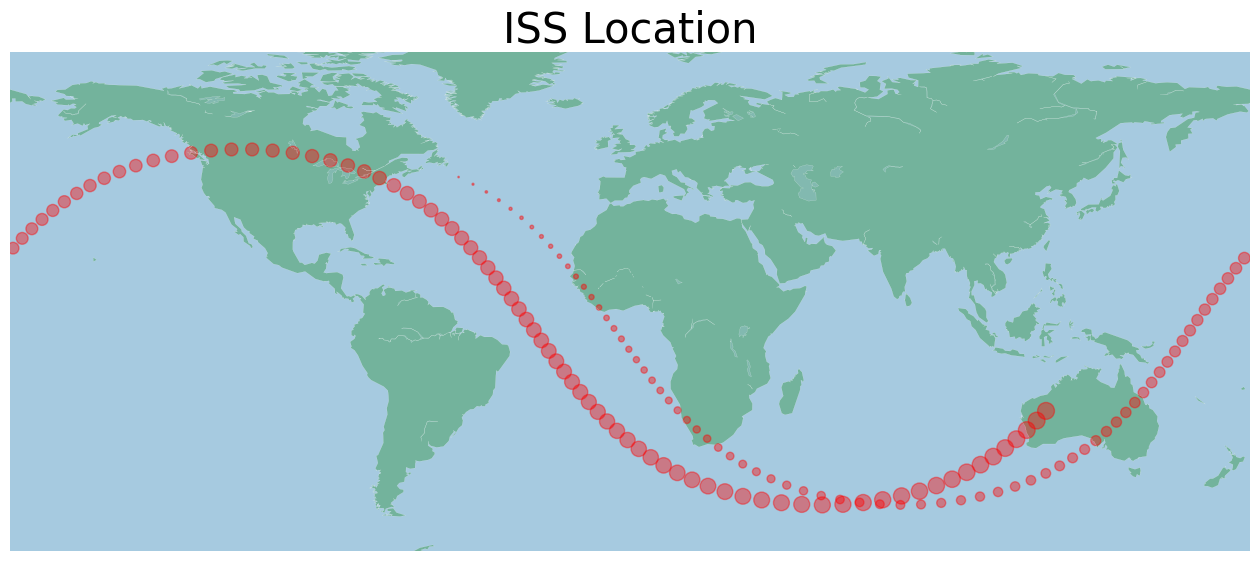

In [24]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16, 8))

map = Basemap(llcrnrlon=-180,llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
map.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
map.fillcontinents(color='green', alpha=0.3)
map.drawcoastlines(linewidth=0.1, color="white")
map.scatter(iss_recorded_data['longitude'], iss_recorded_data['latitude'], s=iss_recorded_data['index'], alpha=0.4, color='red')
plt.title('ISS Location', fontsize=30)